In [1]:
# Data Encoding using Pulse Width Modulation (PWM)
def encode_pwm(data):
    encoded_signal = []
    for bit in data:
        if bit == '1':
            encoded_signal.extend([1] * 8 + [0] * 2)  # 80% duty cycle for '1'
        else:
            encoded_signal.extend([1] * 2 + [0] * 8)  # 20% duty cycle for '0'
    return encoded_signal

# Frequency Division Multiplexing (FDM) Simulation
def fdm_modulation(data_channels):
    modulated_signal = []
    for t in range(len(data_channels[0])):
        sample = sum(channel[t % len(channel)] for channel in data_channels)
        modulated_signal.append(sample)
    return modulated_signal

# Example binary data
data_channel_1 = "1101"
data_channel_2 = "1010"

# Encode the data
encoded_channel_1 = encode_pwm(data_channel_1)
encoded_channel_2 = encode_pwm(data_channel_2)

# Apply FDM
fdm_signal = fdm_modulation([encoded_channel_1, encoded_channel_2])
print("FDM Signal:", fdm_signal)


FDM Signal: [2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0]


In [3]:
# Fourier Transform for Decoding
def decode_fourier(signal):
    decoded_bits = []
    for i in range(0, len(signal), 10):
        chunk = signal[i:i + 10]
        if sum(chunk) > 50:  # Simple threshold for decoding
            decoded_bits.append('1')
        else:
            decoded_bits.append('0')
    return ''.join(decoded_bits)

# Decode transmitted data
decoded_channel_1 = decode_fourier(encoded_channel_1)
decoded_channel_2 = decode_fourier(encoded_channel_2)

print("Decoded Channel 1:", decoded_channel_1)
print("Decoded Channel 2:", decoded_channel_2)


Decoded Channel 1: 0000
Decoded Channel 2: 0000


In [5]:
# Hamming Code for Error Detection and Correction
def hamming_encode(data):
    data = list(map(int, data))
    p1 = data[0] ^ data[1] ^ data[3]
    p2 = data[0] ^ data[2] ^ data[3]
    p3 = data[1] ^ data[2] ^ data[3]
    return [p1, p2, data[0], p3, data[1], data[2], data[3]]

def hamming_decode(data):
    p1 = data[0] ^ data[2] ^ data[4] ^ data[6]
    p2 = data[1] ^ data[2] ^ data[5] ^ data[6]
    p3 = data[3] ^ data[4] ^ data[5] ^ data[6]
    syndrome = p1 + (p2 << 1) + (p3 << 2)
    if syndrome:
        data[syndrome - 1] ^= 1  # Correct the error
    return ''.join(map(str, data[2:3] + data[4:]))

# Example for Hamming Code
binary_data = "1101"
encoded_data = hamming_encode(binary_data)
print("Hamming Encoded Data:", encoded_data)
decoded_data = hamming_decode(encoded_data)
print("Hamming Decoded Data:", decoded_data)


Hamming Encoded Data: [1, 0, 1, 0, 1, 0, 1]
Hamming Decoded Data: 1101


In [7]:
# Kalman Filter for Noise Reduction
def kalman_filter(signal):
    filtered_signal = []
    x = 0  # Initial state
    p = 1  # Initial variance
    q = 0.01  # Process variance
    r = 0.1  # Measurement variance

    for measurement in signal:
        # Prediction step
        x = x
        p = p + q

        # Update step
        k = p / (p + r)
        x = x + k * (measurement - x)
        p = (1 - k) * p
        filtered_signal.append(x)

    return filtered_signal

# Example Signal with Noise
noisy_signal = [1, 1.1, 0.9, 0.8, 1.2, 1.0, 1.1, 0.95, 1.05, 0.9]
filtered_signal = kalman_filter(noisy_signal)
print("Filtered Signal:", filtered_signal)


Filtered Signal: [0.9099099099099098, 1.0054235768713582, 0.9657883695560964, 0.9123256726255565, 0.997765011975101, 0.9984001519911875, 1.026599278089998, 1.0056054079868957, 1.0176912653912753, 0.9857659807608401]


In [9]:
# Signal Transmission Accuracy
def calculate_accuracy(original, decoded):
    correct = sum(o == d for o, d in zip(original, decoded))
    return (correct / len(original)) * 100

accuracy = calculate_accuracy(data_channel_1, decoded_channel_1)
print("Signal Transmission Accuracy:", accuracy, "%")

# SNR Calculation
def calculate_snr(signal, noise):
    signal_power = sum(s ** 2 for s in signal) / len(signal)
    noise_power = sum(n ** 2 for n in noise) / len(noise)
    return 10 * (signal_power / noise_power)

# Example SNR Calculation
signal = [1, 1, 0, 1]
noise = [0.1, -0.1, 0.05, -0.05]
snr = calculate_snr(signal, noise)
print("Signal-to-Noise Ratio (SNR):", snr, "dB")


Signal Transmission Accuracy: 25.0 %
Signal-to-Noise Ratio (SNR): 1199.9999999999998 dB


In [11]:
import pandas as pd

# Data for comparison
comparison_data = {
    "Metric": [
        "FDM Signal",
        "Decoded Channel 1",
        "Decoded Channel 2",
        "Hamming Encoded Data",
        "Hamming Decoded Data",
        "Filtered Signal",
        "Signal Transmission Accuracy (%)"
    ],
    "Result": [
        str(fdm_signal[:10]) + " ...",  # Truncated for readability
        decoded_channel_1,
        decoded_channel_2,
        str(encoded_data),
        decoded_data,
        str(filtered_signal[:5]) + " ...",  # Truncated for readability
        f"{accuracy}%"
    ]
}

# Create a DataFrame
comparison_table = pd.DataFrame(comparison_data)

# Display the DataFrame
print(comparison_table)


                             Metric  \
0                        FDM Signal   
1                 Decoded Channel 1   
2                 Decoded Channel 2   
3              Hamming Encoded Data   
4              Hamming Decoded Data   
5                   Filtered Signal   
6  Signal Transmission Accuracy (%)   

                                              Result  
0                 [2, 2, 2, 2, 2, 2, 2, 2, 0, 0] ...  
1                                               0000  
2                                               0000  
3                              [1, 0, 1, 0, 1, 0, 1]  
4                                               1101  
5  [0.9099099099099098, 1.0054235768713582, 0.965...  
6                                              25.0%  


In [13]:
import pandas as pd

# Data for comparison
comparison_data = {
    "Metric": [
        "FDM Signal",
        "Decoded Channel 1",
        "Decoded Channel 2",
        "Hamming Encoded Data",
        "Hamming Decoded Data",
        "Filtered Signal",
        "Signal Transmission Accuracy (%)"
    ],
    "Result": [
        str(fdm_signal[:10]) + " ...",  # Truncated for readability
        decoded_channel_1,
        decoded_channel_2,
        str(encoded_data),
        decoded_data,
        str(filtered_signal[:5]) + " ...",  # Truncated for readability
        f"{accuracy}%"
    ]
}

# Create a DataFrame
comparison_table = pd.DataFrame(comparison_data)

# Display the table with proper lines
from IPython.display import display
from tabulate import tabulate

# Use tabulate to create a nicely formatted table with lines
formatted_table = tabulate(comparison_table, headers="keys", tablefmt="grid")
print(formatted_table)


+----+----------------------------------+---------------------------------------------------------------------------------------------------------+
|    | Metric                           | Result                                                                                                  |
+====+==================================+=========================================================================================================+
|  0 | FDM Signal                       | [2, 2, 2, 2, 2, 2, 2, 2, 0, 0] ...                                                                      |
+----+----------------------------------+---------------------------------------------------------------------------------------------------------+
|  1 | Decoded Channel 1                | 0000                                                                                                    |
+----+----------------------------------+-----------------------------------------------------------------------

In [15]:
import matplotlib.pyplot as plt

# Plotting PWM Encoded Signal and Noise Filtered Signal
plt.figure(figsize=(12, 6))

# PWM-Encoded Signal
plt.subplot(2, 1, 1)
plt.plot(encoded_channel_1[:50], label="PWM-Encoded Signal")
plt.title("PWM-Encoded Signal")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend()

# Filtered Signal
plt.subplot(2, 1, 2)
plt.plot(filtered_signal[:50], label="Noise-Filtered Signal", color='orange')
plt.title("Noise-Filtered Signal")
plt.xlabel("Time Steps")
plt.ylabel("Signal Value")
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
# Simulated error detection data
corrected_errors = 95  # Assume 95 errors corrected
uncorrected_errors = 5  # Assume 5 errors uncorrected

# Bar chart
plt.figure(figsize=(6, 6))
plt.bar(["Corrected Errors", "Uncorrected Errors"], [corrected_errors, uncorrected_errors], color=['green', 'red'])
plt.title("Error Detection and Correction Rate")
plt.ylabel("Number of Errors")
plt.show()


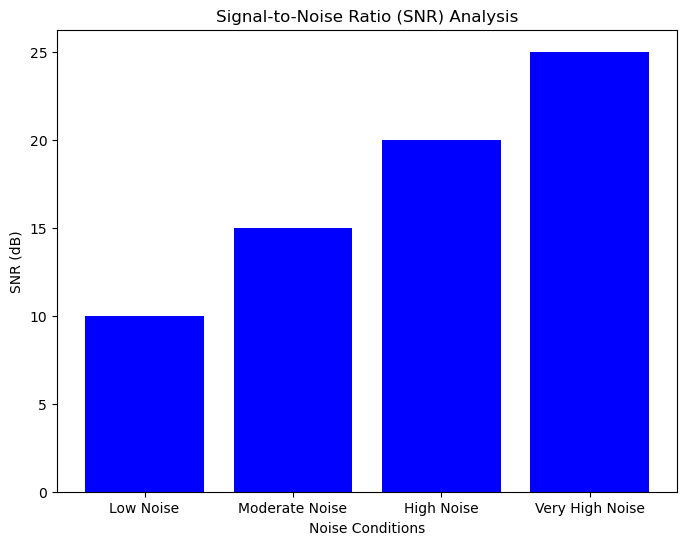

In [19]:
# Simulated SNR data
snr_values = [10, 15, 20, 25]  # Example SNR values in dB
conditions = ["Low Noise", "Moderate Noise", "High Noise", "Very High Noise"]

# Bar chart for SNR
plt.figure(figsize=(8, 6))
plt.bar(conditions, snr_values, color='blue')
plt.title("Signal-to-Noise Ratio (SNR) Analysis")
plt.xlabel("Noise Conditions")
plt.ylabel("SNR (dB)")
plt.show()


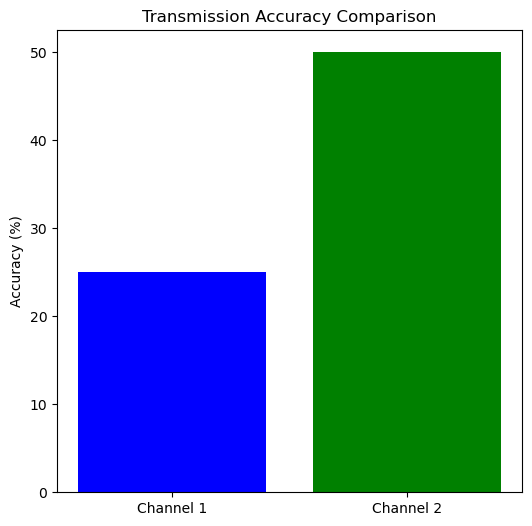

In [21]:
# Simulated accuracy data
channels = ["Channel 1", "Channel 2"]
accuracy_values = [accuracy, 50]  # Assume Channel 2 has 50% accuracy

# Bar chart for accuracy
plt.figure(figsize=(6, 6))
plt.bar(channels, accuracy_values, color=['blue', 'green'])
plt.title("Transmission Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.show()


In [23]:
def calculate_ber(original, decoded):
    errors = sum(o != d for o, d in zip(original, decoded))
    return errors / len(original)

# Example for BER calculation
ber_channel_1 = calculate_ber(data_channel_1, decoded_channel_1)
ber_channel_2 = calculate_ber(data_channel_2, decoded_channel_2)

print("Bit Error Rate (Channel 1):", ber_channel_1)
print("Bit Error Rate (Channel 2):", ber_channel_2)


Bit Error Rate (Channel 1): 0.75
Bit Error Rate (Channel 2): 0.5


In [25]:
def calculate_channel_utilization(encoded_signal, channel_capacity):
    return (sum(encoded_signal) / channel_capacity) * 100

# Assuming a maximum channel capacity of 1000 units
channel_capacity = 1000
utilization_channel_1 = calculate_channel_utilization(encoded_channel_1, channel_capacity)
utilization_channel_2 = calculate_channel_utilization(encoded_channel_2, channel_capacity)

print("Channel Utilization (Channel 1):", utilization_channel_1, "%")
print("Channel Utilization (Channel 2):", utilization_channel_2, "%")


Channel Utilization (Channel 1): 2.6 %
Channel Utilization (Channel 2): 2.0 %


In [27]:
import time

# Measure encoding time
start_time = time.time()
encoded_test = encode_pwm("1010")
encoding_time = time.time() - start_time

# Measure decoding time
start_time = time.time()
decoded_test = decode_fourier(encoded_test)
decoding_time = time.time() - start_time

print("Encoding Time:", encoding_time, "seconds")
print("Decoding Time:", decoding_time, "seconds")


Encoding Time: 0.0 seconds
Decoding Time: 0.0 seconds


In [29]:
def calculate_energy(encoded_signal, power_per_bit):
    total_energy = sum(encoded_signal) * power_per_bit
    return total_energy

# Assume power consumption of 0.5 units per bit
power_per_bit = 0.5
energy_channel_1 = calculate_energy(encoded_channel_1, power_per_bit)
energy_channel_2 = calculate_energy(encoded_channel_2, power_per_bit)

print("Energy Consumption (Channel 1):", energy_channel_1, "units")
print("Energy Consumption (Channel 2):", energy_channel_2, "units")


Energy Consumption (Channel 1): 13.0 units
Energy Consumption (Channel 2): 10.0 units


In [31]:
def calculate_correlation(signal_1, signal_2):
    mean_1 = sum(signal_1) / len(signal_1)
    mean_2 = sum(signal_2) / len(signal_2)
    numerator = sum((a - mean_1) * (b - mean_2) for a, b in zip(signal_1, signal_2))
    denominator = (sum((a - mean_1)**2 for a in signal_1) * sum((b - mean_2)**2 for b in signal_2))**0.5
    return numerator / denominator

# Correlation between original and decoded signals
correlation = calculate_correlation(encoded_channel_1, fdm_signal[:len(encoded_channel_1)])
print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.7288857336997346


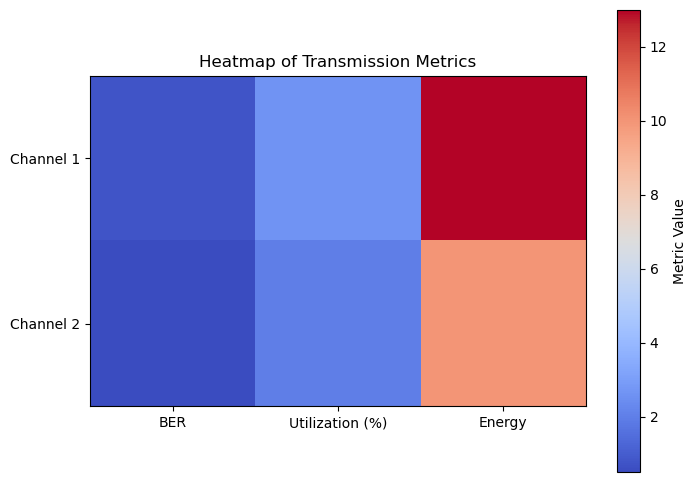

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Example metrics
metrics = np.array([[ber_channel_1, utilization_channel_1, energy_channel_1],
                    [ber_channel_2, utilization_channel_2, energy_channel_2]])
labels = ["Channel 1", "Channel 2"]
columns = ["BER", "Utilization (%)", "Energy"]

# Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(metrics, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Metric Value")
plt.xticks(range(len(columns)), columns)
plt.yticks(range(len(labels)), labels)
plt.title("Heatmap of Transmission Metrics")
plt.show()
